In [40]:
import pandas as pd
from functools import reduce

In [41]:
business = pd.read_csv('./data/business.csv')
attributes = pd.read_csv('./data/atributtes_clean.csv', low_memory=False)
categories = pd.read_csv('./data/categories_fixed.csv')
hours = pd.read_csv('./data/hours_fixed.csv')
gps = pd.read_csv('./data/gps_clustering.csv')
checkins = pd.read_csv('./data/n_checkins.csv')
top_tips = pd.read_csv('./data/top_tips.csv')
target2 = pd.read_csv('./data/target2.csv')
sentiment = pd.read_csv('./data/sentiment/sentiment_ok_unique.csv')

In [42]:
data_frames = [business, attributes, categories, hours, gps, checkins, top_tips, target1]
full_data_2 = reduce(lambda left,right: pd.merge(left,right,on='business_id', how='left'), data_frames)

In [43]:
full_data_2.shape

(150346, 55)

In [44]:
full_data_2.columns

Index(['business_id', 'name', 'postal_code', 'latitude_x', 'longitude_x',
       'stars', 'review_count_x', 'is_open', 'good_ambience', 'garage',
       'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'BikeParking',
       'WiFi', 'delivery', 'GoodForKids', 'OutdoorSeating',
       'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups',
       'Alcohol', 'ByAppointmentOnly', 'Caters', 'RestaurantsAttire',
       'NoiseLevel', 'meal_diversity', 'Restaurants', 'Food', 'Shopping',
       'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical',
       'Local Services', 'Bars', 'Automotive', 'total_categories', '7days',
       'weekends', 'n_open_days', 'mean_total_hours_open', 'mean_open_hour',
       'mean_close_hour', 'latitude_y', 'longitude_y', 'areas',
       'number_visits', 'number_tips', 'Unnamed: 0', 'review_count_y',
       'avg(reactions)', 'avg(stars)', 'avg(Influencer)', 'success_score',
       'target'],
      dtype='object')

In [45]:
to_drop = ['review_count_x','name', 'postal_code', 'latitude_x', 'longitude_x', 'stars', 'is_open', 'latitude_y', 'longitude_y',  'number_visits', 'number_tips', 'Unnamed: 0', '7days', 'n_open_days', 'total_categories', 'mean_open_hour', 'mean_close_hour' ,'number_visits', 'number_tips', 'Unnamed: 0', 'review_count_y',
       'avg(reactions)', 'avg(stars)', 'avg(Influencer)', 'success_score']
full_data_2.drop(to_drop, inplace=True, axis=1)

In [46]:
full_data_2 = full_data_2.loc[full_data_2['areas'] != 7, :]

<AxesSubplot:>

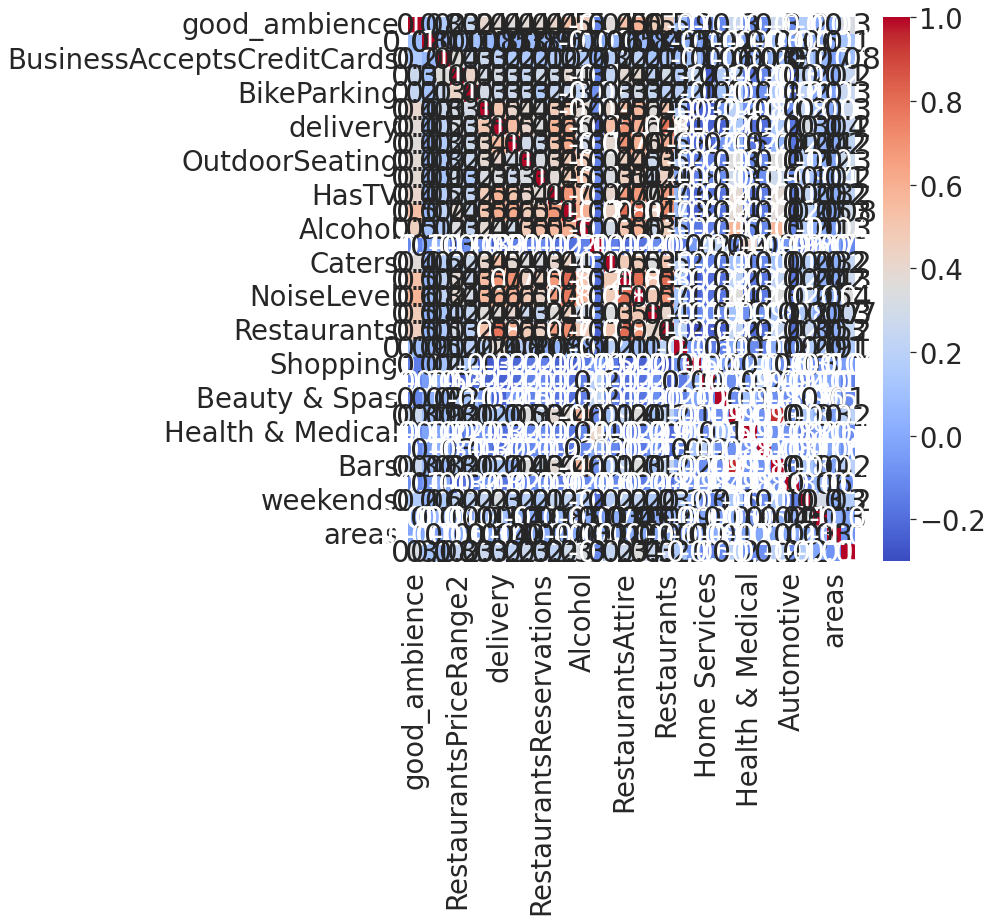

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(full_data_2.corr(method='spearman'), annot=True, fmt='.1g', cmap='coolwarm')

In [48]:
full_data_2.index = full_data_2['business_id']
full_data_2.drop('business_id', axis=1, inplace=True)

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.utils import class_weight

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#from functions import run_exps

import warnings
warnings.filterwarnings('ignore') 

In [50]:
full_data_2.isna().sum()

good_ambience                     0
garage                            0
BusinessAcceptsCreditCards        0
RestaurantsPriceRange2            0
BikeParking                       0
WiFi                              0
delivery                          0
GoodForKids                       0
OutdoorSeating                    0
RestaurantsReservations           0
HasTV                             0
RestaurantsGoodForGroups          0
Alcohol                           0
ByAppointmentOnly                 0
Caters                            0
RestaurantsAttire                 0
NoiseLevel                        0
meal_diversity                    0
Restaurants                     100
Food                            100
Shopping                        100
Home Services                   100
Beauty & Spas                   100
Nightlife                       100
Health & Medical                100
Local Services                  100
Bars                            100
Automotive                  

In [51]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

full_data_2['mean_total_hours_open'] = mice_imputer.fit_transform(full_data_2['mean_total_hours_open'].values.reshape(-1,1))

In [52]:
full_data_2.fillna(0, inplace=True)

In [53]:
full_data_3 = full_data_2.copy()

In [54]:
ohe = OneHotEncoder(sparse=False)
to_transform = ['areas', 'RestaurantsPriceRange2']
X = ohe.fit_transform(full_data_2[to_transform])
X = pd.DataFrame(X, columns=ohe.get_feature_names_out(to_transform), index=full_data_2.index)
full_data_2 = pd.concat([full_data_2, X], axis=1)
full_data_2.drop(to_transform, axis=1, inplace=True)

In [55]:
full_data_2.shape

(145875, 45)

In [56]:
full_data_2.isna().sum().sum()

0

In [57]:
full_data_2.columns

Index(['good_ambience', 'garage', 'BusinessAcceptsCreditCards', 'BikeParking',
       'WiFi', 'delivery', 'GoodForKids', 'OutdoorSeating',
       'RestaurantsReservations', 'HasTV', 'RestaurantsGoodForGroups',
       'Alcohol', 'ByAppointmentOnly', 'Caters', 'RestaurantsAttire',
       'NoiseLevel', 'meal_diversity', 'Restaurants', 'Food', 'Shopping',
       'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical',
       'Local Services', 'Bars', 'Automotive', 'weekends',
       'mean_total_hours_open', 'target', 'areas_0', 'areas_1', 'areas_2',
       'areas_3', 'areas_4', 'areas_5', 'areas_6', 'areas_8', 'areas_9',
       'areas_10', 'RestaurantsPriceRange2_0', 'RestaurantsPriceRange2_1',
       'RestaurantsPriceRange2_2', 'RestaurantsPriceRange2_3',
       'RestaurantsPriceRange2_4'],
      dtype='object')

In [58]:
import wandb
wandb.init(project="henry-tf-g2-ml1")

## EXP 3 - sin canada

In [59]:
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
        '''
        Lightweight script to test many models and find winners
        :param X_train: training split
        :param y_train: training target vector
        :param X_test: test split
        :param y_test: test target vector
        :return: DataFrame of predictions
        '''
        
        dfs = []

        #dt = DecisionTreeClassifier(max_depth=1)

        models = [
                ('LogReg', LogisticRegression()), 
                ('RF', RandomForestClassifier()),
                ('KNN', KNeighborsClassifier()),
                ('GNB', GaussianNB()),
                ('XGB', XGBClassifier()),
                ('ADA', AdaBoostClassifier())
                ]
        results = []
        names = []

        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

        target_names = ['business_fail','business_success']

        for name, model in models:
                kfold = KFold(n_splits=5, shuffle=True, random_state=90210)
                cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
                clf = model.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                print(name)
                print(classification_report(y_test, y_pred))#, target_names=target_names))
                results.append(cv_results)
                names.append(name)
                this_df = pd.DataFrame(cv_results)
                this_df['model'] = name
                dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
        return final

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    full_data_2.drop('target', axis=1), full_data_2['target'], test_size=0.2,
    random_state=42, stratify=full_data_2['target'])

In [61]:
final = run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     23202
           1       0.68      0.37      0.48      5973

    accuracy                           0.84     29175
   macro avg       0.77      0.66      0.69     29175
weighted avg       0.82      0.84      0.82     29175

RF
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     23202
           1       0.62      0.45      0.53      5973

    accuracy                           0.83     29175
   macro avg       0.75      0.69      0.71     29175
weighted avg       0.82      0.83      0.82     29175

[17:03:09] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an 

In [62]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics


## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')


## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

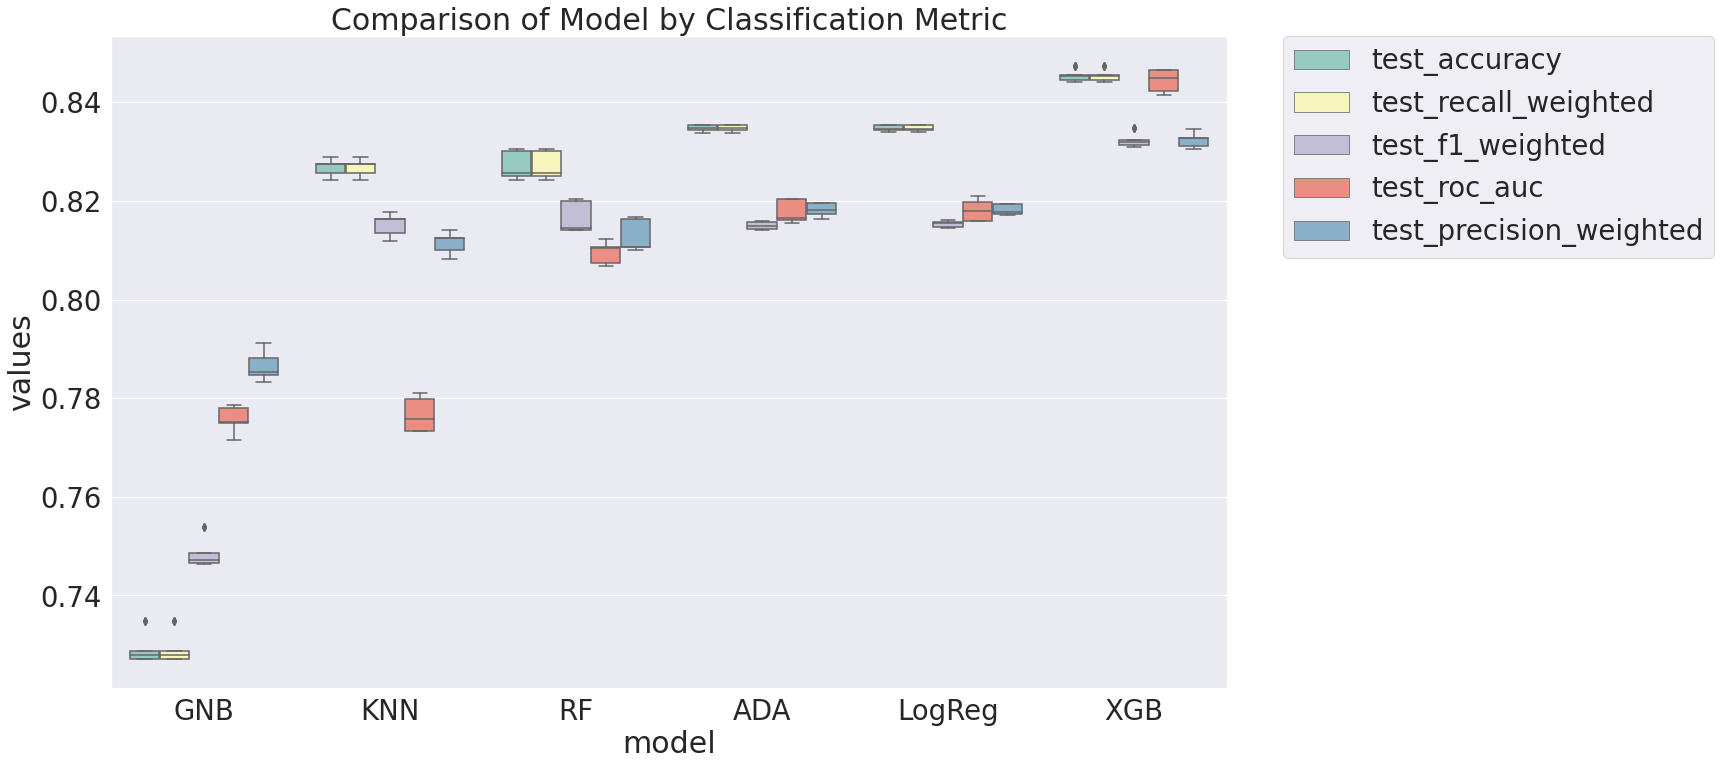

In [63]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [64]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_recall_weighted           test_accuracy           test_roc_auc  \
                        std      mean           std      mean          std   
model                                                                        
ADA                0.000537  0.834821      0.000537  0.834821     0.002207   
GNB                0.002748  0.728920      0.002748  0.728920     0.002196   
KNN                0.001630  0.826881      0.001630  0.826881     0.002873   
LogReg             0.000531  0.834622      0.000531  0.834622     0.001802   
RF                 0.002623  0.827008      0.002623  0.827008     0.001792   
XGB                0.001180  0.845564      0.001180  0.845564     0.002078   

                 test_f1_weighted           test_precision_weighted            
            mean              std      mean                     std      mean  
model                                                                          
ADA     0.817872         0.000665  0.814937                0.001156  0.818341  
GNB     0.775560         0.002661  0.748331                0.002687  0.786462  
KNN     0.776484         0.002126  0.815134                0.002013  0.811545  
LogReg  0.817997         0.000549  0.815310                0.000903  0.818067  
RF      0.809484         0.002807  0.816695                0.002868  0.812898  
XGB     0.844688         0.001373  0.832448                0.001410  0.832559

In [65]:
!pip install plotly

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
import warnings
warnings.filterwarnings('ignore') 

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                'n_estimators': [10,20,50,100,200],
                'subsample': [0.3, 0.5, 0.9],
                'colsample_bytree_vals' : [0.1, 0.5, 0.8, 1],
                'max_depth': [2, 5, 10]
                }


gbm = xgb.XGBClassifier(objective='binary:logistic')

#grid_class = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid, scoring='accuracy', cv=3, verbose=1)
grid_class = RandomizedSearchCV(estimator=gbm,param_distributions=gbm_param_grid, scoring='accuracy', cv=3, verbose=1, n_iter=50, n_jobs=-1)

grid_class.fit(X_train, y_train)

print("Best parameters found: ",grid_class.best_params_)

print("Best accuracy found: ", grid_class.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[17:09:44] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:10:02] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:10:05] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but


In [71]:
print("Best parameters found: ",grid_class.best_params_)

print("Best accuracy found: ", grid_class.best_score_)

Best parameters found:  {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree_vals': 0.1}
Best accuracy found:  0.8443873179091689


[17:14:25] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:09:45] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:10:20] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some p

In [72]:
# Split the data into training and test sets

xg_cl = xgb.XGBClassifier(objective='binary:logistic', 
                        n_estimators=100, 
                        seed=123,
                        learning_rate=0.1,
                        subsample=0.9,
                        colsample_bytree_vals=0.1,
                        max_depth=10)
                        
xg_cl.fit(X_train, y_train)

preds_xgb = xg_cl.predict(X_test)

[17:19:52] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bytree_vals" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




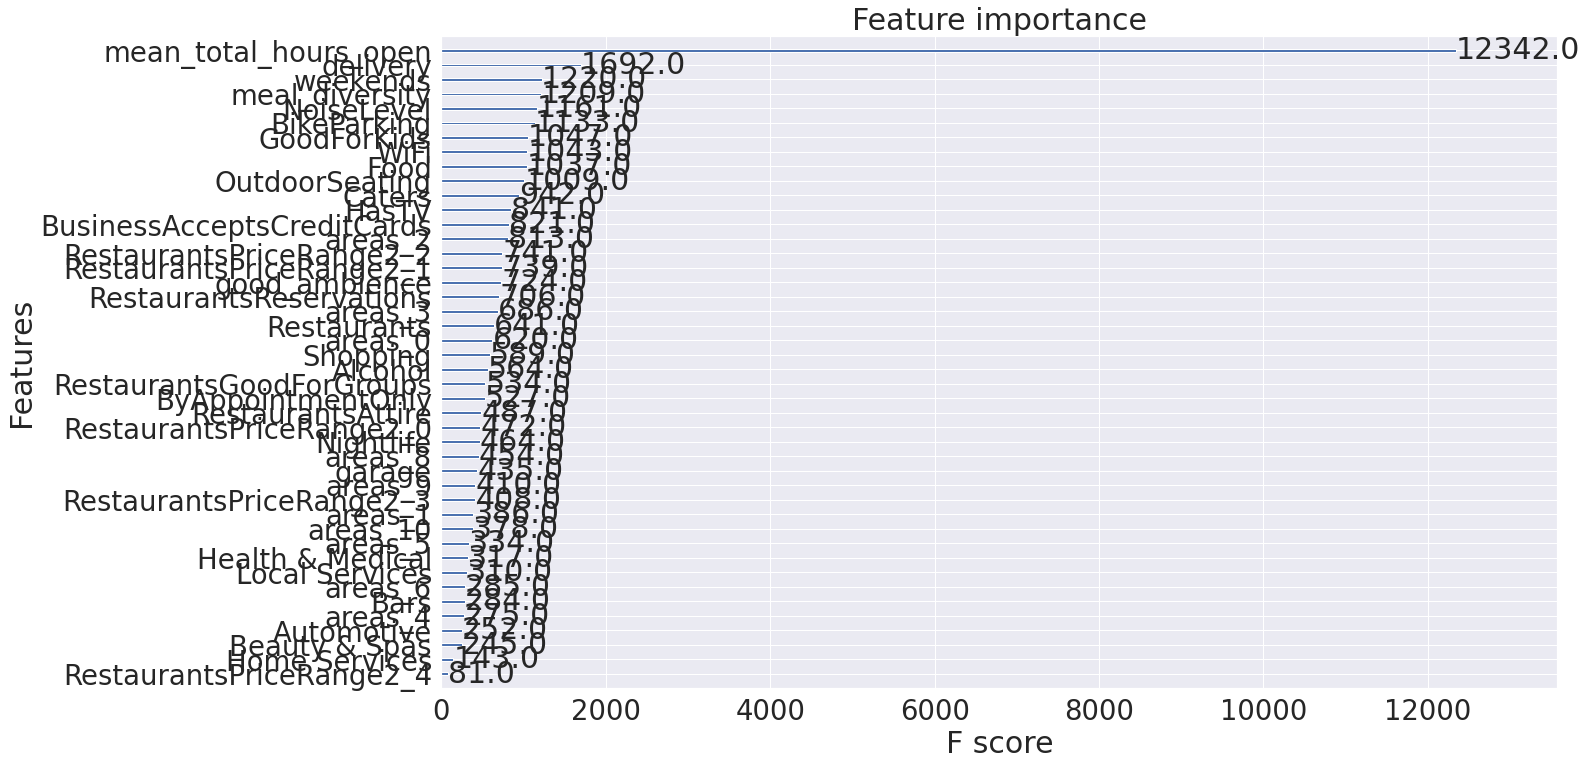

In [73]:
# Plot the feature importances
fig, ax = plt.subplots(figsize=(20, 12))
xgb.plot_importance(xg_cl, ax=ax)
plt.show()
#wandb.log({"plot": plt})

In [74]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds_xgb)

In [75]:
# OR to log a final metric at the end of training you can also use wandb.summary
wandb.summary["accuracy"] = accuracy
# Visualize single plot
wandb.sklearn.plot_confusion_matrix(y_test, preds_xgb)

In [76]:
!add-apt-repository universe
!apt update
!apt install graphviz -y
!pip install graphviz

'universe' distribution component is already enabled for all sources.
Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]  
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]  
Hit:4 https://deb.nodesource.com/node_16.x focal InRelease                     
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      m
Get:6 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1268 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease           
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [2786 kB]m
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [967 kB]m
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2315 kB]
Fetched 7672 kB in 1s (5807 kB/s)   
Reading package lists... Done
Building dependency tree       
Reading state information... Done
104 p

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.880952 to fit


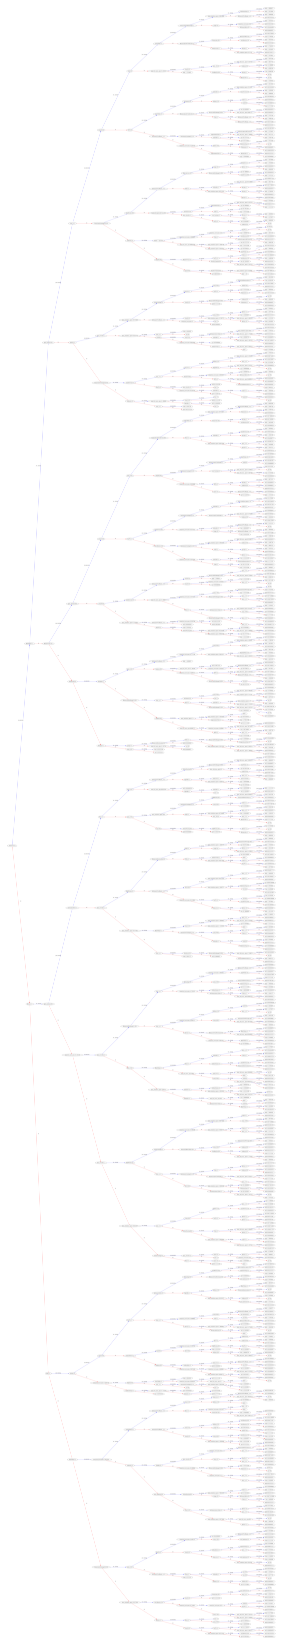

ValueError: min() arg is an empty sequence

In [77]:
fig, ax = plt.subplots(figsize=(30, 30))
# Plot the last tree sideways
xgb.plot_tree(xg_cl,num_trees = 0, rankdir = 'LR', ax=ax)
plt.show()
wandb.log({"plot": plt})

In [79]:
full_data_2.shape

(145875, 45)

In [80]:
!pip install cassandra-driver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 55.4 MB/s eta 0:00:00a 0:00:01


In [81]:
!python -c 'import cassandra; print (cassandra.__version__)'

3.25.0


In [93]:
!ls 

__pycache__			  mytable2.html
benchmark_models_performance.png  review_json.json
benchmark_models_time.png	  spark-3.3.1-bin-hadoop3.tgz
checkin_json.json		  subset1.csv
dags				  transform_funcs.py
data				  user_json.json
functions.py			  user_not_found.txt
heckin_json.json		  wandb
models


In [99]:
!python connect_database.py

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/cassandra/datastax/cloud/__init__.py", line 138, in read_metadata_info
    response = urlopen(url, context=config.ssl_context, timeout=timeout)
  File "/usr/lib/python3.9/urllib/request.py", line 214, in urlopen
    return opener.open(url, data, timeout)
  File "/usr/lib/python3.9/urllib/request.py", line 523, in open
    response = meth(req, response)
  File "/usr/lib/python3.9/urllib/request.py", line 632, in http_response
    response = self.parent.error(
  File "/usr/lib/python3.9/urllib/request.py", line 561, in error
    return self._call_chain(*args)
  File "/usr/lib/python3.9/urllib/request.py", line 494, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.9/urllib/request.py", line 641, in http_error_default
    raise HTTPError(req.full_url, code, msg, hdrs, fp)
urllib.error.HTTPError: HTTP Error 404: Not Found

During handling of the above exception, another exception occurred:

Tra